# Handleiding
Ik installeerde cartopy met:  
```$ conda install -c conda-forge cartopy```

Helaas zaten er fouten in de code omdat python 3.8 nog niet ondersteund wordt...

# Mocht het fout gaan, dan moet je een nieuwe environment aanmaken met python 3.7



# Nieuwe environment:

Om een nieuwe environment en packages te maken, gebruikte ik:
```$ conda create -n cartopy -c conda-forge python=3.7 cartopy matplotlib ipykernel```

Vervolgens moet de i
```$ python -m ipykernel install --user --name cartopy_env```

Tot slot nog jupyter opnieuw starten en dan kan de kernel worden gewijzigd in het menu

In [1]:
import cartopy.crs as ccrs
import cartopy.mpl as cmpl
import cartopy.io.img_tiles as img_tiles
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
%matplotlib inline

# Kijk voor de voorbeelden naar:
https://scitools.org.uk/cartopy/docs/v0.15/gallery.html#web-services

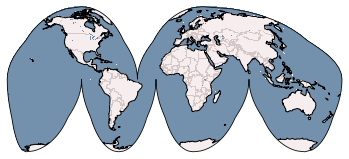

In [2]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

ax.add_wms(wms='http://vmap0.tiles.osgeo.org/wms/vmap0',
           layers=['basic'])

plt.show()

# Het inlezen van de "correcte" projectie van het Rijksdriehoekstelsel
Rijksdriehoek code --> **EPSG:28922**

In [3]:
crs = ccrs.epsg(28992)
crs

_EPSGProjection(28992)

ValueError: The 'woonplaats' layer does not exist in this service.

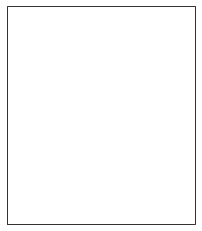

In [5]:
ax = plt.axes(projection=crs)
ax.add_wms(wms='https://geodata.nationaalgeoregister.nl/inspireadressen/wms?request=GetCapabilities&service=wms',
           layers=['woonplaats'])
ax.figure.set_size_inches(12, 10)

# AHN2 voorbeeld

In [ ]:
ax = plt.axes(projection=crs)
ax.figure.set_size_inches(12, 10)
ax.add_wms(wms='http://geodata.nationaalgeoregister.nl/ahn2/wms?',
           layers=['ahn2_5m']);

# Kleuren worden raar weergegeven
Dat komt volgens mij doordat de WMS niet de hoogte waarden verstuurd, maar de cmap waarde van 0-255, en deze is niet lineair maar zeer niet-lineair

# Tot slot nog een uitgebreid voorbeeld
Waarin deze kleuren iets worden aangepast. Let wel dat de getallen op de kleurenschaal niet overeen komen met de hoogte in meter. Als dat je doel is, kun je waarschijnlijk beter een `wmts` gebruiken, of handmatig de juiste kleurenschaal maken op basis van de wms definitie.

In [ ]:
ax = plt.axes(projection=crs)
ax.figure.set_size_inches(12, 10)
xrange = range(0, 100001, 10000)
yrange = range(350000, 460001, 10000)

ax.set_xlim(xrange.start, xrange.stop - 1)
ax.set_ylim(yrange.start, yrange.stop - 1)
m = ax.add_wms(wms='http://geodata.nationaalgeoregister.nl/ahn2/wms?',
           layers=['ahn2_5m'],
           wms_kwargs=dict(crs='EPSG:28992',
                           dpiMode='70'),
          cmap='Spectral_r', norm=colors.Normalize(vmin=25, vmax=50, clip=True))
plt.colorbar(m)
#cmpl.gridliner.Gridliner(axes=ax, crs=crs, xlocator=ticker.IndexLocator(10000, 0))
ax.gridlines(axes=ax, crs=crs,
             xlocs=ticker.FixedLocator(xrange),
             ylocs=ticker.FixedLocator(yrange),
             color='k')
ax.set_xticks(xrange, crs=crs)
ax.set_yticks(yrange, crs=crs)
plt.title('AHN2 over Zeeland, kleurenschaal verkeerd', fontdict={'FontSize': 22});

# Plaatsing van OLV kerk nog net niet goed
In principe had het groene kruis over het rode punt (de Onze Lieve Vrouwenkerk in Amersfoort) moeten staan, maar deze staat daar een slordige 30 meter in x en 125 meter in y richting vanaf. In principe moet de crs de juiste informatie terugspelen aan de matplotlib axes om de juiste locatie te plotten

In [ ]:
ax = plt.axes(projection=crs)
ax.figure.set_size_inches(12, 10)
xrange = range(154850, 155151, 50)
yrange = range(462850, 463151, 50)

ax.set_xlim((xrange.start, xrange.stop - 1))
ax.set_ylim((yrange.start, yrange.stop - 1))
m = ax.add_wms('https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wms?', layers=['Actueel_ortho25'])
ax.gridlines(axes=ax, crs=crs,
             xlocs=ticker.FixedLocator(xrange),
             ylocs=ticker.FixedLocator(yrange),
             color='k')
ax.set_xticks(xrange, crs=crs)
ax.set_yticks(yrange, crs=crs)
ax.plot([154980, 155020], [463000, 463000], '-', lw=5, color='lightgreen')
ax.plot([155000, 155000], [462980, 463020], '-', lw=5, color='lightgreen')
ax.plot(154970, 462885, 'o', ms=20, color='darksalmon', alpha=0.7)

ax.annotate('Onze Lieve Vrouwetoren\n   xy = (155000, 463000)',
            (154970, 462885), xytext=(155000, 462940), FontSize=16,
            bbox=dict(boxstyle="round", fc="darksalmon"), 
            arrowprops=dict(shrink=0.05, fc='darksalmon'))
plt.title('Luchtfoto over Amersfoort, crs/wms foutief', fontdict={'FontSize': 22});

# Google Tiles gaat echter prima:
Een (xyz) tile server van google (anders dan een `wms` of `wmts`) heeft geen problemen met de

In [ ]:
ax = plt.axes(projection=crs)
ax.figure.set_size_inches(12, 10)
xrange = range(154850, 155151, 50)
yrange = range(462850, 463151, 50)

ax.set_xlim((xrange.start, xrange.stop - 1))
ax.set_ylim((yrange.start, yrange.stop - 1))
ax.add_image(img_tiles.GoogleTiles(), 18)
ax.gridlines(axes=ax, crs=crs,
             xlocs=ticker.FixedLocator(xrange),
             ylocs=ticker.FixedLocator(yrange),
             color='k')
ax.set_xticks(xrange, crs=crs)
ax.set_yticks(yrange, crs=crs)
plt.title('Google Tile server over Amersfoort', fontdict={'FontSize': 22});

# Andere RD definitie
Er bestaan meerdere definities van hoe het rijksdriehoekstelsel (Allemaal `EPSG:28992`) moet worden omgezet naar `wgs84`. Dit is erg vervelend om mee te werken, zeker omdat `cartopy` alleen maar toegang heeft tot 1 van deze definities. Bovendien heeft cartopy het erg moeilijk gemaakt om de `crs` objecten dynamisch aan te passen nadat deze zijn gemaakt. In een vermoeiende poging dit op te lossen, werkte het handmatig aanpassen van de `false_northing` en `false_easting` het beste. Eigenlijk geen mooie oplossing, maar wel een die werkt.

In [ ]:
rd_proj4 = crs.proj4_params
globe = ccrs.Globe(ellipse=rd_proj4['ellps'], 
                   towgs84='565.2369,50.0087,465.658,-0.406857330322398,0.350732676542563,-1.8703473836068,4.0812')
crs2 = ccrs.Stereographic(central_longitude=float(rd_proj4['lon_0']),
                          central_latitude=float(rd_proj4['lat_0']),
                          false_easting=float(rd_proj4['x_0'])+30,
                          false_northing=float(rd_proj4['y_0'])+125,
                          scale_factor=float(rd_proj4['k']),
                          globe=globe)

print(crs.proj4_params)
print(crs2.proj4_params)

In [ ]:
ax = plt.axes(projection=crs2)
ax.figure.set_size_inches(12, 10)
xrange = range(154850, 155151, 50)
yrange = range(462850, 463151, 50)

ax.set_xlim((xrange.start, xrange.stop - 1))
ax.set_ylim((yrange.start, yrange.stop - 1))
m = ax.add_wms('https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wms?', 
               layers=['Actueel_ortho25'])
ax.gridlines(axes=ax, crs=crs2,
             xlocs=ticker.FixedLocator(xrange),
             ylocs=ticker.FixedLocator(yrange),
             color='k')
ax.set_xticks(xrange, crs=crs2)
ax.set_yticks(yrange, crs=crs2)
ax.plot([154980, 155020], [463000, 463000], '-', lw=5, color='lightgreen')
ax.plot([155000, 155000], [462980, 463020], '-', lw=5, color='lightgreen')
ax.plot(155000, 463000, 'o', ms=20, color='darksalmon', alpha=0.7)

ax.annotate('Onze Lieve Vrouwetoren\n   xy = (155000, 463000)',
            (155000, 463000), xytext=(155050, 463050), FontSize=16,
            bbox=dict(boxstyle="round", fc="darksalmon"), 
            arrowprops=dict(shrink=0.05, fc='darksalmon'));